# Comp 6934 Winter 2025 Note 8

# Data Archetypes

These notes are modified from notes by Dr. Terrance Tricco.

by E Brown.



## Understanding Data

During this course we look at some common ways of characterizing data, and associated operations, that can help with visualization choices.

These include

* Statistical analyses to assist exploration of the data
* Different perspectives to help describe the data - and construct a story about the subject of the data
* Plot and Chart *types* that are appropriate or not useful for the data
* Styling of visualization, layout and composition of visuals

### Basic characteristics of data

* Aggregate vs Underlying data
* Continuous vs. Categorical data
    * Quantitative vs Qualitative
* Data Types
    * Textual
    * Nominal
    * Ordinal
    * Interval
    * Ratio 

## Underlying (Raw) data

The actual observations as gathered

So far, we have been looking at tabular data that is collected as records/rows with attributes/columns

##### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Load data

We will work with the superhero movie data set obtained and reduced from https://www.kaggle.com/datasets/mdtoomey/box-office-of-dc-and-marvel-superhero-movies.

In [2]:
df = pd.read_csv('datasets/marvel-dc-movies.csv')

In [3]:
df

,Original Title,Company,Rate,Gross Worldwide
0,Guardians of the Galaxy Vol. 2,Marvel,7.6,863756051
1,Spider-Man: Homecoming,Marvel,7.4,880166924
2,Thor:Ragnarok,Marvel,7.9,853977126
3,Black Panther,Marvel,7.3,1346913161
4,Avengers: Infinity War,Marvel,8.5,2048359754
5,Ant-Man and the Wasp,Marvel,7.1,622674139
6,Captain Marve,Marvel,6.9,1128274794
7,Avengers: Endgame,Marvel,8.5,2797800564
8,Spider-Man: Far from Home,Marvel,7.6,1131927996
9,Wonder Woman,DC,7.4,821847012


Each row is a movie. It contains the name of the movie, the cinematic universe to which it belongs, its rating and its worldwide gross in sales.

## Aggregate/Summarized data

Helps understanding the data, but eliminates some information reducing the possible scope of analysis

Underlying data contain more information, possibly containing relationships that are missing in the summarized data.

* Summary data is new information as result of aggregation, but underlying informaiton is lost
* Summaries can be re-created from raw data, but raw data can seldom be inferred from summaries 


In [4]:
df.groupby('Company').agg({'Original Title': 'count', 'Rate': ['min', 'max'], 'Gross Worldwide': 'sum' })

Original Title Rate      Gross Worldwide
                 count  min  max             sum
Company                                         
DC                   5  6.4  8.7      4053009350
Marvel               9  6.9  8.5     11673850509

## Derived data

* Derived data is any data that has been created from underlying
data using mathematical, logical or another type of transformation.
* Derived data could be:
    * Measurements of spread, range, min/max.
    * Percentage calculations.
    * Mean, median, mode.
    * Standard deviation, confidence intervals.
    * Using start and end date to create a time difference.
    * Normalized values, such as converting population stats into per capita.
    * String tokenization, keyword frequency.

## Continuous v. Categorical data

* Continuous data are quantitative data that can can take a
(potentially infinite) range of values.
* Categorical data take on a finite set of values.
* The type of data will limit which visualizations are appropriate.

<hr>

* Continuous data has in-between states that are meaningful.
* Continuous data may be integer (i.e., not a true continuum).

<hr>  

* Categorical data can only take on a finite number of values.
   * Examples: head/tails of a coin flip, day of the week.  
      
* Categorical data may be numerical. Number of stars in a 5-star rating is integer, but there are only 5 possible values.

Categorical data examples:

In [5]:
df[['Original Title', 'Company']]

,Original Title,Company
0,Guardians of the Galaxy Vol. 2,Marvel
1,Spider-Man: Homecoming,Marvel
2,Thor:Ragnarok,Marvel
3,Black Panther,Marvel
4,Avengers: Infinity War,Marvel
5,Ant-Man and the Wasp,Marvel
6,Captain Marve,Marvel
7,Avengers: Endgame,Marvel
8,Spider-Man: Far from Home,Marvel
9,Wonder Woman,DC


* It does not make sense to represent the data below with a line plot.
* There is no ‘in-between’ value between each movie (y-axis)

<BarContainer object of 14 artists>

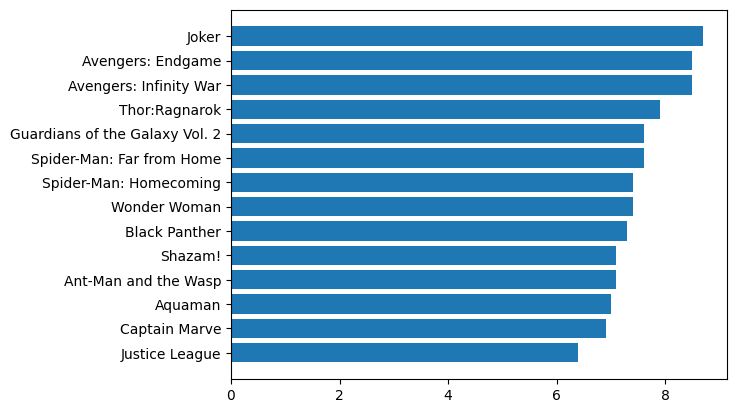

In [7]:
import matplotlib.pyplot as plt

plt.barh('Original Title', 'Rate', data=df.sort_values('Rate'))

Lines imply an in-between value:

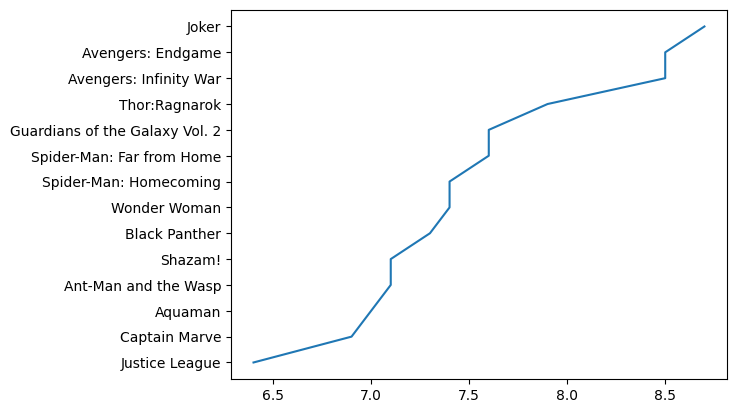

In [8]:
plt.plot('Rate', 'Original Title',  data=df.sort_values('Rate'))

Continuous data examples:

In [6]:
df[['Rate', 'Gross Worldwide']]

,Rate,Gross Worldwide
0,7.6,863756051
1,7.4,880166924
2,7.9,853977126
3,7.3,1346913161
4,8.5,2048359754
5,7.1,622674139
6,6.9,1128274794
7,8.5,2797800564
8,7.6,1131927996
9,7.4,821847012


## TNOIR

* It can be helpful to further categorize the specific type of data held in your data set.
* The TNOIR classification based on work of psychologist
Stanley Stevens in 1946 is widely used.
* It describes data in terms of multiple levels of measurement.
    * TNOIR – Textual, Nominal, Ordinal, Interval and Ratio.

##### Textual Data
* Textual data consists of human language (English, Chinese, etc).
    * Comments included in questionnaires.
    * Newspaper articles.
    * Product descriptions.
    * Speech transcripts.
* It usually exists in unstructured form.
* Typically, textual data will need to be transformed to extract key properties or relational characteristics.
* Transformations may be as simple as counting the frequency of certain keywords.
##### Nominal Data
* Nominal data exists as qualitative categories.
    * Gender of a survey participant.
    * Meals available on a restaurant menu.
    * Sport events in the Olympics.
    * T-shirt colours (red, green, blue, etc).
* Nominal data may be numeric. The jersey number of a sports player helps recognize each unique player, for example.
* However, numeric values are not quantitative values.
* There is no order to numerical values.
* 1 = rock, 2 = paper, 3 = scissors, 1 < 2 and 2 < 3 does not imply 1 < 3
##### Ordinal Data
* Ordinal data exists as qualitative categories.
* Ordinal data is like nominal data, except that ordinal data has a notion of order between values.
    * Size of t-shirts from XS to XXL.
    * Gold, silver and bronze medals of the Olympics.
    * Satisfaction rating from 1 star to 5 stars on a survey.
* Recognizing categorical data as either nominal or ordinal may influence the design choices in your visualization (particularly range of colour).
##### Interval Data
* Interval data exists as quantitative measurements.
    * Forecasted temperature in degrees C.
    * Latitude and Longitude coordinates of a location.
* For interval data, absolute difference between two values is meaningful, but the ratio of two values is not.
* The zero state of an interval scale is not a true zero.
* Interval data includes the possibility of negative values.
* 0º C does not mean there is no temperature
##### Ratio Data
* Ratio data exists as quantitative measurements.
    * Age in years.
    * Forecasted amount of rainfall in mm.
    * Number of sales of a book.
    * Distance of winning long jump in metres at the Olympics.
* Ratio data has a true zero measurement, meaning no amount.
* Can define a ratio between two values.
* A 20-year old compared to a 10-year old, and an 80-year old compared to a 40-year old – both are twice as old.


## TNOIR Summary
* Textual – free-form words and text.
* Nominal – categorical data with no ordering between values.
* Ordinal – categorical data with ordering between values.
* Interval – continuous data where zero is not a true zero (negative
values possible).
* Ratio – continuous data where zero means no amount. Ratios
between two values are meaningful.

## Tidy Data
* Tidy Data is a standard for organizing tabular data, popularized by the R
programming language.
* Tidy data is data where:
    * Every column is a variable.
    * Every row is an observation.
    * Every cell is a single value.
* Working with tidy data is easier and less aggravating that non-tidy
data.
* Each row (data point) is self-contained
    * Multiple rows are not needed to
    understand an observation.

In the example below, the data is NOT tidy, because the information for the movie is on multiple rows.

In [9]:
df.melt(id_vars=['Original Title'], value_vars=['Company', 'Rate', 'Gross Worldwide']).sort_values(by='Original Title').head(6)

,Original Title,variable,value
33,Ant-Man and the Wasp,Gross Worldwide,622674139
19,Ant-Man and the Wasp,Rate,7.1
5,Ant-Man and the Wasp,Company,Marvel
39,Aquaman,Gross Worldwide,1148161807
25,Aquaman,Rate,7.0
11,Aquaman,Company,DC


### Tidying Data with pandas
* pandas provides methods to transform how data is arranged.
* two we have not yet covered: 
    * .melt() will turn a column, or multiple columns, into a set of
    (key, value) pairs contained in two columns.
    * .pivot() can be used to un-melt data.

## Melt

pandas ``.melt()`` is a way to convert column data into key-value pairs. 

It takes two arguments. The first is a list of columns that act as the identifier variables. The second is a list of columns that are to be converted into key-value pairs.

Using ``.melt()``, we shall convert the rating and the worldwide gross for each movie into key-value pairs.

In [10]:
df.melt(id_vars=['Original Title', 'Company'], value_vars=['Rate', 'Gross Worldwide'])

,Original Title,Company,variable,value
0,Guardians of the Galaxy Vol. 2,Marvel,Rate,7.600000e+00
1,Spider-Man: Homecoming,Marvel,Rate,7.400000e+00
2,Thor:Ragnarok,Marvel,Rate,7.900000e+00
3,Black Panther,Marvel,Rate,7.300000e+00
4,Avengers: Infinity War,Marvel,Rate,8.500000e+00
5,Ant-Man and the Wasp,Marvel,Rate,7.100000e+00
6,Captain Marve,Marvel,Rate,6.900000e+00
7,Avengers: Endgame,Marvel,Rate,8.500000e+00
8,Spider-Man: Far from Home,Marvel,Rate,7.600000e+00
9,Wonder Woman,DC,Rate,7.400000e+00


Notice that the ``Rate`` and ``Worldwide Gross`` columns have been replaced with ``variable`` (key) and ``value`` columns. 

All of the same data is present in our DataFrame. It is just arranged differently.

We could also include Company as one of the key-value pairs. Now we have 3 key-value pairs in the variable / value columns.

In [11]:
df.melt(id_vars=['Original Title'], value_vars=['Company', 'Rate', 'Gross Worldwide']).sort_values(by='Original Title')

,Original Title,variable,value
33,Ant-Man and the Wasp,Gross Worldwide,622674139
19,Ant-Man and the Wasp,Rate,7.1
5,Ant-Man and the Wasp,Company,Marvel
39,Aquaman,Gross Worldwide,1148161807
25,Aquaman,Rate,7.0
11,Aquaman,Company,DC
35,Avengers: Endgame,Gross Worldwide,2797800564
21,Avengers: Endgame,Rate,8.5
7,Avengers: Endgame,Company,Marvel
32,Avengers: Infinity War,Gross Worldwide,2048359754


What would we use as the x- and y-data if we wanted to make a scatter plot of rating vs worldwide gross and our data was in this format?
 
The values for rating and worldwide gross of each movie are contained in the same column. That will make it hard to plot this data in this form.

We can plot it easily with our original DataFrame because the x/y data are in separate columns. This is not true for our untidy DataFrame.



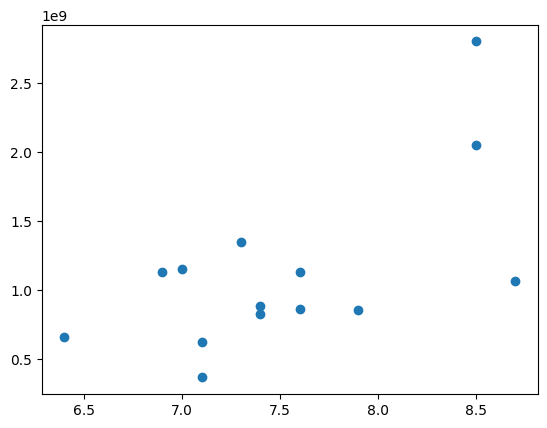

In [12]:
fig, ax = plt.subplots()

ax.scatter(df['Rate'], df['Gross Worldwide'])

## Pivot (Un-melt)

To un-melt a DataFrame, we can use ``.pivot()``.

It takes three arguments:
- The first is a list of identifier variables - these are the same identifier variables you used when melting. 
- The second is the column that contains the key names. 
- The third is the value. (Making the second and third columns the key/value pairs.)

In [27]:
df_melt = df.melt(id_vars=['Original Title', 'Company'], value_vars=['Rate', 'Gross Worldwide'])

In [28]:
df_melt

,Original Title,Company,variable,value
0,Guardians of the Galaxy Vol. 2,Marvel,Rate,7.600000e+00
1,Spider-Man: Homecoming,Marvel,Rate,7.400000e+00
2,Thor:Ragnarok,Marvel,Rate,7.900000e+00
3,Black Panther,Marvel,Rate,7.300000e+00
4,Avengers: Infinity War,Marvel,Rate,8.500000e+00
5,Ant-Man and the Wasp,Marvel,Rate,7.100000e+00
6,Captain Marve,Marvel,Rate,6.900000e+00
7,Avengers: Endgame,Marvel,Rate,8.500000e+00
8,Spider-Man: Far from Home,Marvel,Rate,7.600000e+00
9,Wonder Woman,DC,Rate,7.400000e+00


We can un-melt our DataFrame using `.pivot()`.

In [31]:
df_melt.pivot(index=['Original Title', 'Company'], columns='variable', values='value').reset_index()

variable,Original Title,Company,Gross Worldwide,Rate
0,Ant-Man and the Wasp,Marvel,6.226741e+08,7.1
1,Aquaman,DC,1.148162e+09,7.0
2,Avengers: Endgame,Marvel,2.797801e+09,8.5
3,Avengers: Infinity War,Marvel,2.048360e+09,8.5
4,Black Panther,Marvel,1.346913e+09,7.3
5,Captain Marve,Marvel,1.128275e+09,6.9
6,Guardians of the Galaxy Vol. 2,Marvel,8.637561e+08,7.6
7,Joker,DC,1.060505e+09,8.7
8,Justice League,DC,6.579243e+08,6.4
9,Shazam!,DC,3.645717e+08,7.1


And just like that, we have un-melted our DataFrame.

Keep in mind that ``.pivot()`` will set the index of the resulting DataFrame to the identifier variables. Just like with ``.groupby()``, applying a ``.reset_index()`` will change those back to regular columns.

## Dangerous Melts

Sometimes melting data can cause information loss. In the previous example, the movie name uniquely identifies an observation. If we melt using the company column, what happens?

In [16]:
df

,Original Title,Company,Rate,Gross Worldwide
0,Guardians of the Galaxy Vol. 2,Marvel,7.6,863756051
1,Spider-Man: Homecoming,Marvel,7.4,880166924
2,Thor:Ragnarok,Marvel,7.9,853977126
3,Black Panther,Marvel,7.3,1346913161
4,Avengers: Infinity War,Marvel,8.5,2048359754
5,Ant-Man and the Wasp,Marvel,7.1,622674139
6,Captain Marve,Marvel,6.9,1128274794
7,Avengers: Endgame,Marvel,8.5,2797800564
8,Spider-Man: Far from Home,Marvel,7.6,1131927996
9,Wonder Woman,DC,7.4,821847012


Each row has a unique movie title. This allows it to act as a unique index when we melt.

In [17]:
df.melt(id_vars=['Original Title'], value_vars=['Company', 'Rate', 'Gross Worldwide'])

,Original Title,variable,value
0,Guardians of the Galaxy Vol. 2,Company,Marvel
1,Spider-Man: Homecoming,Company,Marvel
2,Thor:Ragnarok,Company,Marvel
3,Black Panther,Company,Marvel
4,Avengers: Infinity War,Company,Marvel
5,Ant-Man and the Wasp,Company,Marvel
6,Captain Marve,Company,Marvel
7,Avengers: Endgame,Company,Marvel
8,Spider-Man: Far from Home,Company,Marvel
9,Wonder Woman,Company,DC


For any particular movie, we can find the company the produced the movie, its rating, and its gross worldwide sales. The movie title is unique, so this works ok.

However, the Company is not a unique identifier. Multiple movies have the same Company. If we melt using Company, we will lose information.

In [18]:
df_melt = df.melt(id_vars=['Company'], value_vars=['Original Title', 'Rate', 'Gross Worldwide'])
df_melt

,Company,variable,value
0,Marvel,Original Title,Guardians of the Galaxy Vol. 2
1,Marvel,Original Title,Spider-Man: Homecoming
2,Marvel,Original Title,Thor:Ragnarok
3,Marvel,Original Title,Black Panther
4,Marvel,Original Title,Avengers: Infinity War
5,Marvel,Original Title,Ant-Man and the Wasp
6,Marvel,Original Title,Captain Marve
7,Marvel,Original Title,Avengers: Endgame
8,Marvel,Original Title,Spider-Man: Far from Home
9,DC,Original Title,Wonder Woman


In the above, we cannot determine the Gross Worldwide of Rating of any specific movie. For example, there is a movie with a rating of 8.7 -- but which movie is it? All the values are still present, but we no longer know how to associate the values together.

We cannot use ``.pivot()`` to un-melt our data. Using only whether the movie was made by Marvel or DC does not uniquely identify it -- they create many movies. 

In [19]:
df_melt.pivot(index='Company', columns='variable', values='value')

ValueError: Index contains duplicate entries, cannot reshape

## Summary

``melt()`` and ``pivot()`` are useful for managing the shape of your data. If you have a data set that is not in a tidy format, then these may help re-arrange your data to make it tidy.

They may also be useful for re-arranging your data to match the API of another library you are working with.